In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm, tqdm_notebook

In [2]:
df = pd.read_csv('6단계.csv', engine = 'python')
pd.set_option('max_columns', None)
df

,등록 정보 ID,제품,파생 제품,브랜드,회사,Ultimate Company,시장,발행연도,발행일,카테고리,하위 카테고리,가격 (US Dollars),가격 (Euros),포지셔닝 클레임,보관유형,팩 사이즈(ml/g),Packaging Units,패키지 유형 (자세히),패키지 재료,영양 성분,변수 수,제품 설명,출시 형태,County/State,PL(자사 브랜드 상품),Currency,현지 가격,바코드,Production Code,맛,향수,1차 이미지 미리보기,Record hyperlink,원재료 1,원재료 2,원재료 3,원재료 4,원재료 5,원재료 6,원재료 7,원재료 8,원재료 9,남은 원재료,클레임
0,6226131,Natural Steamed Tuna,Natural Steamed Tuna,Petit Navire,Ets Paul Paulet,Ets Paul Paulet,프랑스,2018,2018-12-28,"육류, 어류 및 가금류 가공식품",어류 가공식품,4.16,3.68,"윤리 - 친환경 패키지, 간단한 사용, 재활용",상온 진열,130.0,g,캔,금속 강철,"Per 100g: Energy 475kJ/112kcal, Fat 0.9g (of w...",1,Petit Navire Thon Vapeur Nature (Natural Steam...,새로운 패키지,NaN,브랜드 상품,€,3.68,3.019080e+12,NaN,첨가된 향/맛 없음/일반,NaN,https://media.mintel.com/i01/mediaserver/perfo...,http://www.gnpd.com/sinatra/recordpage/6226131/,참치,물,소금,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6207317,Tandoori King Prawns with Dip,Tandoori King Prawns with Dip,Marks & Spencer The Collection,Marks & Spencer,Marks & Spencer,프랑스,2018,2018-12-17,"육류, 어류 및 가금류 가공식품",어류 가공식품,11.38,9.99,"프리미엄, 글루텐 무첨가, 알레르기 유발 항원(소량/없음/감량), 윤리 - 친환경 ...",냉장,210.0,g,접시,플라스틱(명시되지 않음),tandoori king prawns (per 100g): energy 487kJ/...,1,Marks & Spencer The Collection Gambas Marin?es...,재출시,NaN,PL(자사 브랜드 상품),€,9.99,8.924760e+05,UK RH 012 EC,탄두리,NaN,https://media.mintel.com/i01/mediaserver/perfo...,http://www.gnpd.com/sinatra/recordpage/6207317/,Prawn,토마토 퓨레,해바라기씨유,생강,마늘 퓨레,고추,tandoori seasoning,소금,NaN,NaN,NaN
2,6207229,Scallop Risotto,Scallop Risotto,Thiriet,Glaces Thiriet,Glaces Thiriet,프랑스,2018,2018-12-14,간편 조리 식품,가정 편의식,8.54,7.50,"전자레인지 조리 가능, 윤리 - 친환경 패키지, 윤리 - 친환경 제품, 간단한 사용...",냉동,350.0,g,접시,NaN,Per 350g serving (1 serving per pack): Energy ...,1,Thiriet Risotto aux Noix de St-Jacques (Scallo...,새 유사 제품/카테고리 확장,NaN,PL(자사 브랜드 상품),€,7.50,3.292590e+12,FR 22.182.001 CE,NaN,NaN,https://media.mintel.com/i01/mediaserver/perfo...,http://www.gnpd.com/sinatra/recordpage/6207229/,Scallop,쌀,물,콩류,우유(일반),Parsnip,Yellow Carrot,Fish Stock,아황산염,"Muscadet Wine, 치즈 및 치즈 제품, 샬롯, 해바라기씨유, 변성 전분, ...",NaN
3,6207239,Scallop Ravioli Cassolettes,Scallop Ravioli Cassolettes,Thiriet Les Traiteurs,Glaces Thiriet,Glaces Thiriet,프랑스,2018,2018-12-14,간편 조리 식품,가정 편의식,10.93,9.60,"윤리 - 친환경 패키지, 간단한 사용, 재활용",냉동,100.0,g,Flexible,플라스틱(명시되지 않음),"Per 100g: Energy 278kJ/66kcal, Fat 1.7g (of wh...",1,Thiriet Les Traiteurs Cassolettes de Ravioles ...,새 유사 제품/카테고리 확장,NaN,PL(자사 브랜드 상품),€,9.60,3.292590e+12,FR 29.075.020 CE,NaN,NaN,https://media.mintel.com/i01/mediaserver/perfo...,http://www.gnpd.com/sinatra/recordpage/6207239/,Poultry Stock,밀가루,Scallop,계란,우유(일반),Yellow Carrot,당근,리크,Lemongrass,"계란 흰자, 리크, 생강, 물, 골파, Scallop Extract, 소금, Sta...",NaN
4,6193569,Pork Nem Spring Rolls with Nuoc Mam Sauce,Pork Nem Spring Rolls with Nuoc Mam Sauce,Selection Itin?raire des Saveurs Saveur de Chine,Intermarch?,Les Mousquetaires,프랑스,2018,2018-12-12,스낵류,애피타이저/카나페,2.51,2.21,NaN,냉장,280.0,g,접시,플라스틱(명시되지 않음),Per 140g serving (2 servings per pack): Energy...,2,Selection Itin?raire des Saveurs Saveur de Chi...,새로운 패키지,NaN,PL(자사 브랜드 상품),€,2.21,3.250390e+12,FR 44-072-002 CE,"돼지고기, Fish Sauce/Nuoc Mam",NaN,https://media.mintel.com/i01/mediaserver/perfo...,http://www.gnpd.com/sinatra/recordpage/6193569/,rice wrap (34.7%),rehydrated pea vermicelli,양파,당근,돼지고기,Rehydrated Soy Protein,베이컨 지방,Flavouring Preparations,Soybean Proteins,"소금, Bamboo Fibre, 버섯",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13989,2277343,"Cod, Minted Pea & Parsley Fishcakes","Cod, Minted Pea & Parsley Fishcakes",Specially Selected,Aldi,Aldi Group,영국,2014,2014-01-03,"육류, 어류 및 가금류 가공식품",어류 가공식품,3.06,2.29,프리미엄,냉장,290.0,g,접시,플라스틱(명시되지 않음),"Per 100g: Energy 794kJ/189kcal, Fat 8.3g (of w...",5,"Specially Selected Cod, Minted Pea & Parsley F...",새 유사 제품/카테고리 확장,Warwickshire,PL(자사 브랜드 상품),?,1.99,2.531775e+07,UK BB052 EC,NaN,NaN,https://media.mintel.com/i01/mediaserver/perfo.

In [3]:
df = df[df['카테고리']=='간편 조리 식품']
df.reset_index(drop = True, inplace = True)
df

,등록 정보 ID,제품,파생 제품,브랜드,회사,Ultimate Company,시장,발행연도,발행일,카테고리,하위 카테고리,가격 (US Dollars),가격 (Euros),포지셔닝 클레임,보관유형,팩 사이즈(ml/g),Packaging Units,패키지 유형 (자세히),패키지 재료,영양 성분,변수 수,제품 설명,출시 형태,County/State,PL(자사 브랜드 상품),Currency,현지 가격,바코드,Production Code,맛,향수,1차 이미지 미리보기,Record hyperlink,원재료 1,원재료 2,원재료 3,원재료 4,원재료 5,원재료 6,원재료 7,원재료 8,원재료 9,남은 원재료,클레임
0,6207229,Scallop Risotto,Scallop Risotto,Thiriet,Glaces Thiriet,Glaces Thiriet,프랑스,2018,2018-12-14,간편 조리 식품,가정 편의식,8.54,7.50,"전자레인지 조리 가능, 윤리 - 친환경 패키지, 윤리 - 친환경 제품, 간단한 사용...",냉동,350.0,g,접시,NaN,Per 350g serving (1 serving per pack): Energy ...,1,Thiriet Risotto aux Noix de St-Jacques (Scallo...,새 유사 제품/카테고리 확장,NaN,PL(자사 브랜드 상품),€,7.50,3.292590e+12,FR 22.182.001 CE,NaN,NaN,https://media.mintel.com/i01/mediaserver/perfo...,http://www.gnpd.com/sinatra/recordpage/6207229/,Scallop,쌀,물,콩류,우유(일반),Parsnip,Yellow Carrot,Fish Stock,아황산염,"Muscadet Wine, 치즈 및 치즈 제품, 샬롯, 해바라기씨유, 변성 전분, ...",NaN
1,6207239,Scallop Ravioli Cassolettes,Scallop Ravioli Cassolettes,Thiriet Les Traiteurs,Glaces Thiriet,Glaces Thiriet,프랑스,2018,2018-12-14,간편 조리 식품,가정 편의식,10.93,9.60,"윤리 - 친환경 패키지, 간단한 사용, 재활용",냉동,100.0,g,Flexible,플라스틱(명시되지 않음),"Per 100g: Energy 278kJ/66kcal, Fat 1.7g (of wh...",1,Thiriet Les Traiteurs Cassolettes de Ravioles ...,새 유사 제품/카테고리 확장,NaN,PL(자사 브랜드 상품),€,9.60,3.292590e+12,FR 29.075.020 CE,NaN,NaN,https://media.mintel.com/i01/mediaserver/perfo...,http://www.gnpd.com/sinatra/recordpage/6207239/,Poultry Stock,밀가루,Scallop,계란,우유(일반),Yellow Carrot,당근,리크,Lemongrass,"계란 흰자, 리크, 생강, 물, 골파, Scallop Extract, 소금, Sta...",NaN
2,6184647,Mexican Style Tuna Salad,Mexican Style Tuna Salad,Les Doris,Aldi,Aldi Group,프랑스,2018,2018-12-07,간편 조리 식품,샐러드,1.42,1.25,"윤리 - 친환경 패키지, 윤리 - 친환경 제품, 재활용, 서식지 / 자원 보호",상온 진열,280.0,g,캔,금속 강철,Per 280g serving (1 serving per pack): Energy ...,1,Les Doris Salade Mexicaine au Thon (Mexican St...,새 유사 제품/카테고리 확장,NaN,PL(자사 브랜드 상품),€,1.25,2.601506e+07,FR 62.448.100 CE,"Mexican, 참치",NaN,https://media.mintel.com/i01/mediaserver/perfo...,http://www.gnpd.com/sinatra/recordpage/6184647/,Kidney Bean,Skipjack Tuna,물,옥수수,고추,식초,Gherkin,양파,유채유,"소금, Modified Corn Starch, White Sugar, 증점제, Na...",NaN
3,6184857,Alaskan Pollock with Sorrel Sauce and Rice,Alaskan Pollock with Sorrel Sauce and Rice,Les L?gendaires,Aldi,Aldi Group,프랑스,2018,2018-12-07,간편 조리 식품,가정 편의식,2.10,1.85,"전자레인지 조리 가능, 윤리 - 친환경 패키지, 시간/속도, 재활용",상온 진열,300.0,g,접시,플라스틱 PP,Per 300g serving (1 serving per pack): Energy ...,1,Les L?gendaires Colin d'Alaska Sauce Oseille e...,새로운 패키지,NaN,PL(자사 브랜드 상품),€,1.85,2.602448e+07,FR 29.269.020 CE,"Pollock/Pollack, 수영",NaN,https://media.mintel.com/i01/mediaserver/perfo...,http://www.gnpd.com/sinatra/recordpage/6184857/,쌀,Pacific Pollack,물,크림,샬롯,버터,Sorrel,Modified Corn Starch,겔화제,"소금, 착향료, 화이트 와인, 조미료, White Sugar, 레몬 주스 농축액",NaN
4,6176095,Tielles S?toises Tarts,Tielles S?toises Tarts,Nos R?gions Ont du Talent,Scamark,E.Leclerc,프랑스,2018,2018-12-06,간편 조리 식품,패스트리,2.56,2.26,NaN,냉장,220.0,g,접시,플라스틱(명시되지 않음),"Per 100g: Energy 1,199kJ/286kcal, Fat 13.1g (o...",1,Nos R?gions Ont du Talent Tielles ? la S?toise...,새 유사 제품/카테고리 확장,NaN,PL(자사 브랜드 상품),€,2.26,3.564710e+12,FR 34.113.500 CE,맛/향 첨가 불가,NaN,https://media.mintel.com/i01/mediaserver/perfo...,http://www.gnpd.com/sinatra/recordpage/6176095/,Pastry,Filled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053,2352831,Tuna Infusions with Basil and Sun-Dried Tomato...,Tuna Infusions with Basil and Sun-Dried Tomato...,John West Steam Pot,John West Foods,John West,영국,2014,2014-04-01,간편 조리 식품,밀 키트,4.14,3.09,"식품 첨가물 및 방부제 없음, 천연 소재 제품, 프리미엄, 윤리 - 동물, 고단백,...",상온 진열,150.0,g,둥근 형태의 통,플라스틱 PP,"Per 100g: Energy 625kJ/149kcal, Fat 4.6g (of w...",2,John West Steam Pot Tuna Infusions with Basil ...,신제품,NaN,브랜드 상품,?,2.69,5.000170e+12,FR 29.046.514 CE,NaN,NaN,https://media.mintel.com/i01/mediaserver/perfo...,http://www

In [4]:
print(df['제품'][0])

Scallop Risotto


In [5]:
example1 = BeautifulSoup(df['제품'][0])
example1.get_text()

'Scallop Risotto'

In [6]:
letters_only = re.sub("[^a-zA-Z]",
                     " ",
                     example1.get_text())
letters_only

'Scallop Risotto'

In [7]:
lower_case = letters_only.lower()
words = lower_case.split()
words

['scallop', 'risotto']

In [8]:
#nltk.download()

In [9]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
words = [w for w in words if not w in stopwords.words("english")]
words 

['scallop', 'risotto']

In [11]:
def review_to_words(raw_review):
    review_text = BeautifulSoup(raw_review).get_text() #1. Remove HTML
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) #2. Remove non-letters
    words = letters_only.lower().split() #3. Convert to lower case, split words
    stops = set(stopwords.words("english")) #4. Convert list to stop words set
    meaningful_words = [w for w in words if not w in stops] #5. Remove stop words
    return(" ".join(meaningful_words)) #6. Join the words back into one string seperated by space,

In [12]:
clean_review = review_to_words(df['제품'][0])
clean_review

'scallop risotto'

In [13]:
num_reviews = df['제품'].size
print(num_reviews)

4058


In [14]:
clean_train_reviews = []

In [15]:
for i in tqdm_notebook(range(0, num_reviews)):
    clean_train_reviews.append(review_to_words(df['제품'][i]))

In [16]:
clean_train_reviews

['scallop risotto',
 'scallop ravioli cassolettes',
 'mexican style tuna salad',
 'alaskan pollock sorrel sauce rice',
 'tielles toises tarts',
 'fish chips',
 'tuna bulgur red pepper mint tabbouleh',
 'american style tuna salad',
 'salmon sorrel sauce pasta twists',
 'salad nicoise',
 'prawn risotto',
 'salmon lasagne',
 'puff pastries filled salmon dill',
 'smoked salmon potato dill salad',
 'ni oise tuna salad',
 'tuna tomato quiche',
 'chinese style chicken noodles',
 'torti surimi mustard salad',
 'pissaladiere',
 'cod pie',
 'american style tuna salad',
 'alaskan pollock sorrel sauce rice',
 'prawn wok spicy sauce rice noodles vegetables',
 'sushi rolls',
 'wild salmon spinach pastry',
 'king prawn alfredo',
 'king prawn curry',
 'tuna thin crust pizza',
 'fish chips',
 'salmon dill salad',
 'mexican tuna salad',
 'parisian tuna salad dijon mustard',
 'country style tuna salad',
 'tuna rice salad',
 'linguine scallops pancetta peas',
 'scottish lochmuir salmon primavera',
 'king 

In [17]:
#Creating the bag of words
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
vectorizer = CountVectorizer(analyzer = "word",
                            tokenizer = None,
                            preprocessor = None,
                            stop_words = None,
                            max_features = 3000)

In [19]:
import numpy as np

In [20]:
train_data_features = vectorizer.fit_transform(clean_train_reviews)

In [21]:
train_data_features = train_data_features.toarray()

In [22]:
train_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
train_data_features.shape

(4058, 1399)

In [24]:
vocab = vectorizer.get_feature_names()
vocab

['abalone',
 'abeno',
 'acid',
 'acqua',
 'adductor',
 'admiral',
 'adult',
 'afuri',
 'aglio',
 'agu',
 'aitsu',
 'aizu',
 'ajillo',
 'ajito',
 'akai',
 'akasaka',
 'akita',
 'al',
 'alaska',
 'alaskan',
 'alfredo',
 'alla',
 'almonds',
 'amagasaki',
 'american',
 'anchovy',
 'ankake',
 'anniversary',
 'anpanman',
 'aoba',
 'aoc',
 'aomori',
 'aperitif',
 'apetaito',
 'apple',
 'apples',
 'aromatic',
 'arroz',
 'asa',
 'asahikawa',
 'asia',
 'asian',
 'asparagus',
 'assorted',
 'assortment',
 'atlantic',
 'au',
 'aubergine',
 'autumn',
 'avocado',
 'awa',
 'baby',
 'back',
 'backbone',
 'bacon',
 'bagel',
 'bagna',
 'baguette',
 'baguettes',
 'bai',
 'bake',
 'baked',
 'ball',
 'balls',
 'balsamic',
 'balti',
 'bamboo',
 'bami',
 'bamiyan',
 'banshu',
 'bar',
 'barbecue',
 'bari',
 'barley',
 'based',
 'bases',
 'basil',
 'baskets',
 'basmati',
 'basque',
 'bass',
 'bbq',
 'bean',
 'beans',
 'bearnaise',
 'beef',
 'beetroot',
 'beijing',
 'benten',
 'bento',
 'bhuna',
 'bianco',
 'bib

In [25]:
#단어별 빈도 집계 
dist = np.sum(train_data_features, axis = 0)
for tag, count in zip(vocab, dist) :
    print(count, tag)

1 abalone
1 abeno
1 acid
1 acqua
1 adductor
1 admiral
1 adult
3 afuri
1 aglio
1 agu
1 aitsu
1 aizu
10 ajillo
1 ajito
1 akai
6 akasaka
3 akita
2 al
7 alaska
21 alaskan
4 alfredo
1 alla
1 almonds
1 amagasaki
3 american
1 anchovy
2 ankake
1 anniversary
1 anpanman
3 aoba
1 aoc
8 aomori
1 aperitif
1 apetaito
3 apple
1 apples
31 aromatic
1 arroz
1 asa
6 asahikawa
1 asia
5 asian
15 asparagus
36 assorted
9 assortment
1 atlantic
1 au
11 aubergine
1 autumn
1 avocado
2 awa
14 baby
17 back
1 backbone
16 bacon
3 bagel
2 bagna
4 baguette
3 baguettes
1 bai
8 bake
7 baked
6 ball
7 balls
1 balsamic
1 balti
8 bamboo
1 bami
1 bamiyan
1 banshu
1 bar
3 barbecue
1 bari
12 barley
1 based
1 bases
20 basil
1 baskets
17 basmati
1 basque
1 bass
4 bbq
10 bean
10 beans
1 bearnaise
62 beef
1 beetroot
2 beijing
1 benten
2 bento
3 bhuna
5 bianco
3 bibimbab
1 bibimbap
1 bibinmen
8 big
1 bisque
1 bites
42 black
3 blue
1 bo
2 boiled
1 bologna
1 bolognese
1 bon
31 bonito
2 boscaiola
5 bouillabaisse
1 boursin
5 bowl
16 bo

1 peppercorn
8 peppers
5 perilla
1 pes
6 pescatora
4 pescatore
6 pesto
1 petit
25 pho
1 phong
1 pi
1 pice
2 pickled
3 pickles
55 pie
1 piece
1 pieces
1 piedmont
1 piedmontese
1 pies
1 pig
2 pikachu
1 pikaichitei
2 pike
31 pilaf
3 pilau
5 pineapple
2 pink
1 piquillo
1 pissaladiere
2 pistou
57 pizza
1 pizzas
1 pk
1 plain
1 plenty
11 plum
1 plums
1 pockets
1 pois
2 pok
8 pokemon
1 pollack
15 pollock
1 pomegranate
1 pomodoro
3 ponzu
1 poo
1 popcorn
3 poppy
1 porcini
107 pork
37 porridge
51 pot
49 potato
12 potatoes
1 pots
2 powder
1 prao
1 prat
125 prawn
52 prawns
14 premium
2 preparation
1 press
3 primavera
1 protein
2 proven
4 provencal
5 pudding
19 puff
1 puffer
2 pufferfish
1 pulp
6 pumpkin
1 punch
1 pur
1 pure
5 puree
1 puttasnesca
1 quail
1 queen
7 quiche
2 ra
9 radish
1 ragu
2 rainbow
1 rairaitei
863 ramen
1 ranbu
1 range
1 ranma
1 raspberry
2 ratatouille
1 ravioli
3 raw
8 rayu
2 recipe
51 red
5 reduced
1 refined
1 refreshing
1 reggiano
1 restaurant
1 revival
1 rib
2 ribbon
2 ricain

In [26]:
keyword = pd.DataFrame([dist], columns=vocab)
keyword

,abalone,abeno,acid,acqua,adductor,admiral,adult,afuri,aglio,agu,aitsu,aizu,ajillo,ajito,akai,akasaka,akita,al,alaska,alaskan,alfredo,alla,almonds,amagasaki,american,anchovy,ankake,anniversary,anpanman,aoba,aoc,aomori,aperitif,apetaito,apple,apples,aromatic,arroz,asa,asahikawa,asia,asian,asparagus,assorted,assortment,atlantic,au,aubergine,autumn,avocado,awa,baby,back,backbone,bacon,bagel,bagna,baguette,baguettes,bai,bake,baked,ball,balls,balsamic,balti,bamboo,bami,bamiyan,banshu,bar,barbecue,bari,barley,based,bases,basil,baskets,basmati,basque,bass,bbq,bean,beans,bearnaise,beef,beetroot,beijing,benten,bento,bhuna,bianco,bibimbab,bibimbap,bibinmen,big,bisque,bites,black,blue,bo,boiled,bologna,bolognese,bon,bonito,boscaiola,bouillabaisse,boursin,bowl,box,boxes,braised,bramley,bran,brandade,bravas,brazilian,bread,breadcrumbs,breaded,breakfast,bream,breton,brittany,broccoli,broiled,broth,brown,browned,bubuka,bucatini,buckwheat,bulgogi,bulgur,bun,bunashimeji,buns,burdock,burger,burgundy,burnt,butter,cabbage,caesar,cafeteria,cake,calamarata,calamari,california,calorie,camargue,cannelloni,cantonese,caper,capon,caponata,caramel,caramelised,caramelized,carbonara,carefully,carrot,carrots,cashew,casserole,casseroles,cassolette,cassolettes,catalan,cereals,cha,chablis,champagne,champon,chan,chanko,chanpon,chanpuru,chapje,char,charcoal,chargrilled,che,cheddar,cheese,cheeses,cherry,chestnut,chew,chewy,chiang,chiba,chick,chicken,chickpeas,chige,chiggae,chiken,chikuzenni,chili,chilled,chilli,chima,chinchintei,chinese,chip,chips,chitose,chive,chives,chop,chorizo,choshi,chow,chowder,christmas,chuka,cider,citrus,clam,clams,clarence,classic,clear,cloudy,club,cock,cocktail,coconut,cod,cognac,cold,coley,colletti,colourful,complete,compote,comt,conchiglie,cone,confit,congee,conger,consomm,cooked,cooking,coral,coriander,corn,corolles,country,couscous,cr,crab,crabstick,cracker,crafted,crayfish,crazy,cream,creamy,crispy,cro,cromer,croque,croquette,croute,croutes,crowns,crozets,crudit,crudite,crumb,crumbs,crunch,crunchy,crushed,crust,crustaceans,crusted,cucumber,cumberland,cumin,cup,curd,cured,curried,curry,cutlet,daikon,daily,daisaikai,dak,dandan,dash,dashi,date,deep,delhi,deli,delicious,delights,deluxe,demi,demiglace,di,dijon,dill,dinner,dip,dipping,dish,dishes,divina,dodanuki,dog,doria,doro,doughnut,dragon,dressing,dried,dry,duck,dumpling,dumplings,duo,easter,eastern,easy,ebikin,ebisu,ed,edam,edamame,edition,edo,eel,egg,eggs,eight,eirin,en,esprit,european,express,extra,extremely,family,farfalle,fat,favourites,fearless,fennel,festival,fettuccine,feu,fideu,filled,fillet,fillets,filling,fin,fine,finest,finished,finkenwerder,fire,firecracker,fired,fish,fishball,fisherman,five,fk,flacvour,flake,flaked,flakes,flaky,flammekueche,flan,flat,flatfish,flavour,flavoured,flax,flaxseed,florentine,flounder,flying,fondue,four,fra,fragrant,france,free,fregola,french,fresh,freshwater,fried,frito,fritter,fritto,fromage,frozen,fruity,frutti,fry,fugetsu,fujicco,fujieda,fusilli,fusion,ga,galbi,ganmodoki,gapao,gaprao,garganelli,garlic,genoese,genovese,gentle,german,gherkins,giant,gigli,gilt,ginger,ginza,glace,gluten,goat,gokkei,gold,golden,gonokami,goong,goreng,gourmet,grain,grainy,grana,grass,grassnoodle,grated,gratin,gravlax,green,greens,grenaille,grilled,ground,guangdong,gyorai,gyoza,habanero,hachiya,haddock,hakata,hake,hakodate,ham,hamayudori,hamburger,hanabi,hanada,handcrafted,hard,harissa,hashed,hat,hawaiian,hayashi,head,herb,herbs,herring,hijiki,hinge,hinges,hinoya,hiro,hiroshima,hokkaido,honey,hong,horse,horseradish,hoshi,hot,hoto,hototogisu,hulu,hut,hyakunichidori,hyogo,iberian,ide,iida,iitoko,imabari,imoni,inaba,inaniwa,indian,indonesian,indulgent,infant,infusions,ink,inspired,instant,ippei,ippin,ippudo,ishigaki,ism,italian,itto,izumi,jajamen,jako,jalapeno,jalfrezi,jam,jan,japan,japanese,japchae,jasmine,jelly,jijim,jikon,jindaiji,jjigae,joto,juicy,juntoro,jyako,kabayaki,kado,kageyamaro,kagoshima,kai,kalbi,kamameshi,kamatama,kanazawa,kanda,kanefuku,kansai,kao,katag

In [27]:
#keyword.to_csv('스프레드_keyword.csv')

In [28]:
dist

array([ 1,  1,  1, ..., 30, 31,  1], dtype=int64)

In [29]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600):
    wordcloud = WordCloud(stopwords = STOPWORDS,
                         background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

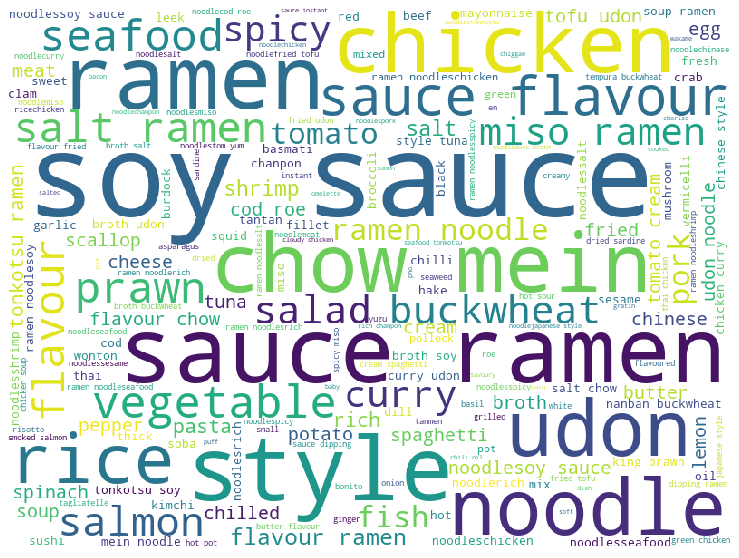

Wall time: 5.86 s


In [31]:
%time displayWordCloud(''.join(clean_train_reviews))

In [32]:
product_keyword = pd.DataFrame(train_data_features, columns=vocab)

In [33]:
import networkx as nx

In [34]:
product_keyword = product_keyword.astype(bool)

In [35]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [42]:
keyword_ar = (apriori(product_keyword, min_support = 0.01, use_colnames=True)).sort_values(by=['support'], axis = 0, ascending=False)
keyword_ar['length'] = keyword_ar['itemsets'].apply(lambda x:len(x))
keyword_ar2 = keyword_ar[(keyword_ar['length']==2)&(keyword_ar['support']>=0.02)]
keyword_ar2

,support,itemsets,length
144,0.103499,"(soy, sauce)",2
112,0.095860,"(ramen, noodle)",2
121,0.092410,"(noodles, ramen)",2
134,0.065550,"(ramen, sauce)",2
136,0.062839,"(soy, ramen)",2
124,0.059389,"(noodles, sauce)",2
86,0.051996,"(mein, chow)",2
115,0.049532,"(sauce, noodle)",2
127,0.045835,"(noodles, soy)",2
120,0.038935,"(udon, noodle)",2


In [37]:
G = nx.Graph()
ar = (keyword_ar2['itemsets']);G.add_edges_from(ar)

In [38]:
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 - (nsize-min(nsize))/(max(nsize)-min(nsize))

In [39]:
pos = nx.circular_layout(G)

C:\Users\yeowoon\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
findfont: Font family ['KoPubDotum'] not found. Falling back to DejaVu Sans.


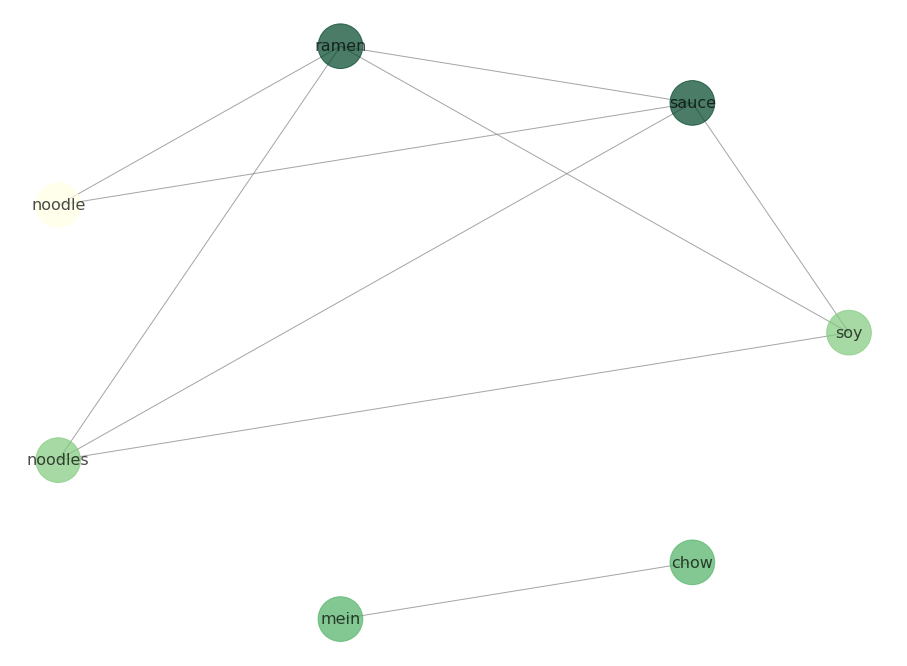

In [40]:
plt.figure(figsize=(16,12))
plt.axis('off')
nx.draw_networkx(G,font_family='KoPubDotum', font_size=16, pos=pos, node_color=list(pr.values()), node_size=nsize, alpha=0.7, edge_color='.5', cmap=plt.cm.YlGn)